In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
df = pd.read_csv('./ml_source_files/bike_sharing.csv')
df.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [106]:
df['datetime'] = pd.to_datetime(df.datetime)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [108]:
df['year'] = df['datetime'].apply(lambda x: str(x.year))
df['month'] = df['datetime'].apply(lambda x: str(x.month))
df['day'] = df['datetime'].apply(lambda x: str(x.day))
df['hour'] = df['datetime'].apply(lambda x: str(x.hour))

In [109]:
df.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1


In [110]:
df.drop(['datetime','casual','registered'], axis=1, inplace=True)

In [111]:
df = pd.get_dummies(df)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 66 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   count       10886 non-null  int64  
 9   year_2011   10886 non-null  uint8  
 10  year_2012   10886 non-null  uint8  
 11  month_1     10886 non-null  uint8  
 12  month_10    10886 non-null  uint8  
 13  month_11    10886 non-null  uint8  
 14  month_12    10886 non-null  uint8  
 15  month_2     10886 non-null  uint8  
 16  month_3     10886 non-null  uint8  
 17  month_4     10886 non-null  uint8  
 18  month_5     10886 non-null  uint8  
 19  month_6     10886 non-nul

In [113]:
from sklearn.metrics import mean_squared_error, mean_absolute_error # ????????????????

def rmse(y, pred):
    squarred_error = (y - pred)**2
    rmse = np.sqrt(np.mean(squarred_error))
    return rmse

In [114]:
y = df['count']
x = df.drop('count', axis=1)

In [115]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

In [116]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
lr = LinearRegression()
rid = Ridge()
las = Lasso()

lr.fit(x_train, y_train)
rid.fit(x_train, y_train)
las.fit(x_train, y_train)

Lasso()

In [117]:
preds_lr = lr.predict(x_test)
preds_rid = rid.predict(x_test)
preds_las = las.predict(x_test)

print('rmse_lr : ', rmse(y_test, preds_lr), 'rmse_rid : ', rmse(y_test, preds_rid), 'rmse_las : ', rmse(y_test, preds_las))

rmse_lr :  100.32930147615251 rmse_rid :  100.32834300901123 rmse_las :  103.4956221019296


In [118]:
x_train

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year_2011,year_2012,...,hour_21,hour_22,hour_23,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9
8414,3,0,1,2,28.70,32.575,58,16.9979,0,1,...,0,0,1,0,0,0,0,0,0,0
6601,1,0,1,1,13.94,16.665,61,8.9981,0,1,...,0,0,0,0,0,0,0,0,1,0
530,1,0,0,3,8.20,12.880,100,0.0000,1,0,...,0,0,0,0,0,0,1,0,0,0
4725,4,0,1,1,15.58,19.695,87,0.0000,1,0,...,0,0,1,0,0,0,0,0,0,0
6727,1,0,0,1,25.42,31.060,53,6.0032,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,1,0,0,1,10.66,14.395,56,6.0032,1,0,...,0,0,0,0,0,0,0,0,0,0
79,1,0,1,1,9.02,10.605,51,19.9995,1,0,...,0,0,0,0,0,0,0,0,0,0
8039,2,0,1,1,24.60,29.545,69,11.0014,0,1,...,0,0,0,0,0,0,0,0,1,0
6936,2,0,0,1,13.94,15.910,34,16.9979,0,1,...,0,0,0,0,0,0,0,0,1,0


In [119]:
# scaling

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [120]:
x_train_scaled

array([[0.66666667, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.33333333, 0.        , 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.33333333, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [121]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
lr = LinearRegression()
rid = Ridge(alpha=2)
las = Lasso(alpha=0.01)

lr.fit(x_train, y_train)
rid.fit(x_train, y_train)
las.fit(x_train, y_train)

preds_lr = lr.predict(x_test)
preds_rid = rid.predict(x_test)
preds_las = las.predict(x_test)

print('rmse_lr : ', rmse(y_test, preds_lr), 'rmse_rid : ', rmse(y_test, preds_rid), 'rmse_las : ', rmse(y_test, preds_las))

rmse_lr :  100.32930147615251 rmse_rid :  100.32921938080877 rmse_las :  100.32211882218485


In [122]:
lr.score(x_test_scaled, y_test)

0.5260957687070593

In [123]:
coef_df = pd.DataFrame(lr.coef_, index=x.columns)
coef_df.sort_values(0, ascending=True)

,0
hour_4,-168.137610
hour_3,-165.203057
hour_2,-153.463953
hour_5,-151.670303
hour_1,-145.665162
...,...
hour_16,101.065020
hour_19,118.558400
hour_8,185.166411
hour_18,231.297947


<AxesSubplot:>

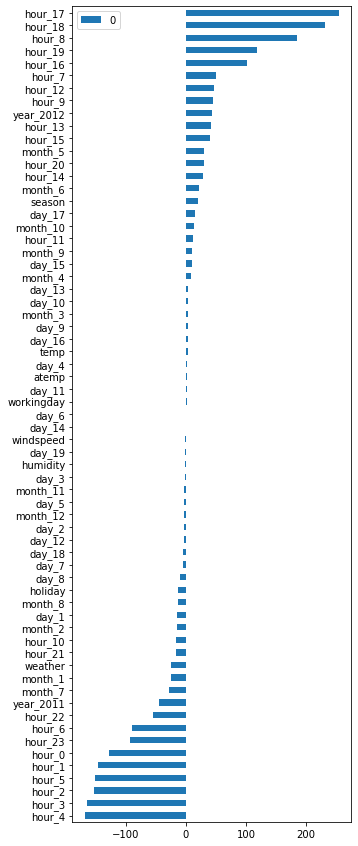

In [124]:
coef_df.sort_values(0).plot(kind='barh', figsize=(5,15))

In [125]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRFRegressor
from lightgbm import LGBMRegressor

In [126]:
from sklearn.metrics import mean_squared_error

In [127]:
rfr = RandomForestRegressor()
gb = GradientBoostingRegressor()
xgb = XGBRFRegressor()
lig = LGBMRegressor()

In [131]:
for model in [rfr, gb, xgb, lig]:
    model.fit(x_train_scaled, y_train)
    preds = model.predict(x_test_scaled)
    rmse = rmse(mean_squared_error(y_test, preds))
    print(model.__class__.__name__, rmse)

TypeError: rmse() missing 1 required positional argument: 'pred'

In [ ]:
# y 분포

<AxesSubplot:>

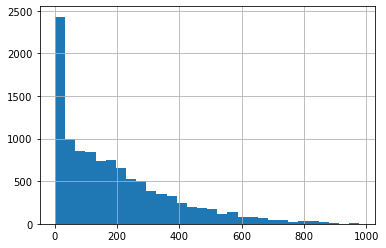

In [133]:
y.hist(bins=30)     # long tail - label값이 쏠려 있음

In [134]:
y_log = np.log1p(y)
y_train_log = np.log1p(y_train)        # 0값으로 인한 error를 방지 : np.log1p()
y_test_log = np.log1p(y_test)

In [137]:
lr = LinearRegression()
rid = Ridge(alpha=2)
las = Lasso(alpha=0.01)

lr.fit(x_train, y_train_log)
rid.fit(x_train, y_train_log)
las.fit(x_train, y_train_log)


preds_lr = lr.predict(x_test_scaled)
preds_rid = rid.predict(x_test_scaled)
preds_las = las.predict(x_test_scaled)

preds_lr_ep = expm1(preds_lr)
preds_rid_ep = expm1(preds_rid)
preds_las_ep = expm1(preds_las)

print('rmse_lr : ', np.sqrt(mean_squared_error(y_test, preds_lr_exp)))
print('rmse_rid : ', np.sqrt(mean_squared_error(y_test, preds_rid_exp)))
print('rmse_las : ', np.sqrt(mean_squared_error(y_test, preds_las_exp)))
# print('rmse_lr : ', rmse(y_test, preds_lr), 'rmse_rid : ', rmse(y_test, preds_rid), 'rmse_las : ', rmse(y_test, preds_las))

NameError: name 'expm1' is not defined

<AxesSubplot:>

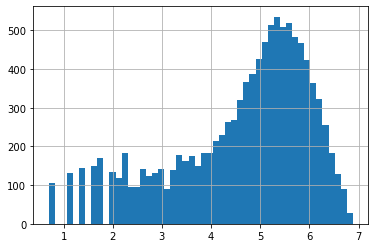

In [135]:
y_log.hist(bins=50)